In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
train = pd.read_csv(os.path.join('train.csv'))
test = pd.read_csv(os.path.join('test.csv'))
ss = pd.read_csv(os.path.join('Sample_submission.csv'))

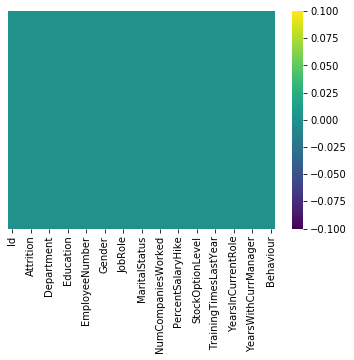

In [22]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
for i in train.columns:
    if train[i].dtype == np.object:
        train[i]=le.fit_transform(train[i])

for i in test.columns:
    if test[i].dtype == np.object:
        test[i]=le.fit_transform(test[i])

In [25]:
train.drop(['Id', 'Behaviour'], axis=1, inplace=True)
test.drop(['Id', 'Behaviour'], axis=1, inplace=True)

In [26]:
"""correlation = train.corr().round(2)
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)"""

'correlation = train.corr().round(2)\nfig, ax = plt.subplots(figsize=(18,18))\nsns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)'

In [28]:
X_train = train.drop('Attrition', axis=1)
y_train = train.Attrition

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [30]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
y_train_dt = DT.predict_proba(X_train)
dt_score = roc_auc_score(y_train, y_train_dt[:,1])
dt_score

1.0

In [32]:
y_predict = DT.predict_proba(test)

In [33]:
ss=ss.drop('Attrition',axis=1)
ss['Attrition']=y_predict[:,1]
ss.to_csv('submission_dt.csv',index=False)

In [39]:
train.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'CommunicationSkill'],
      dtype='object')

C:\Users\akhil\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\akhil\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\akhil\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

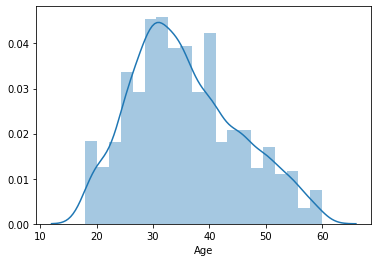

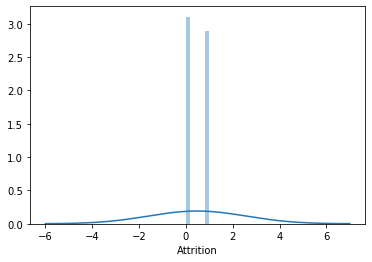

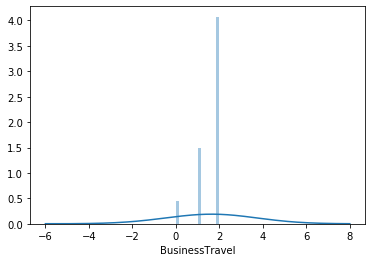

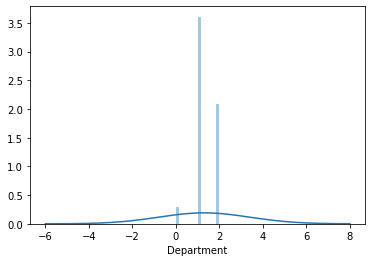

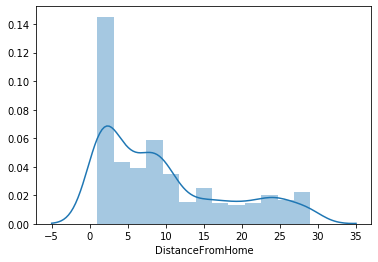

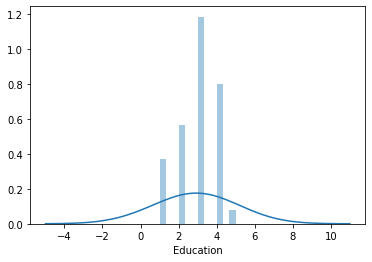

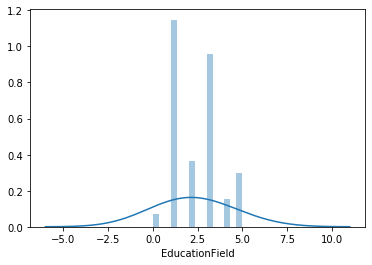

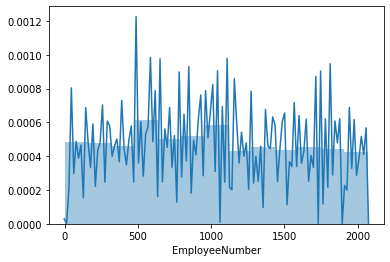

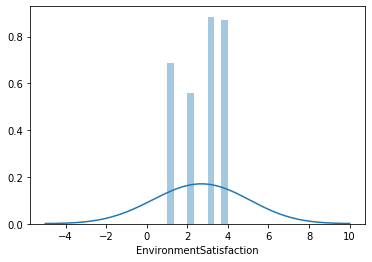

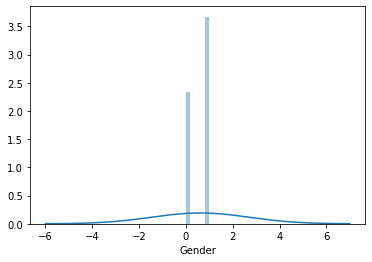

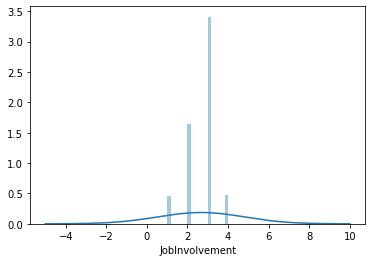

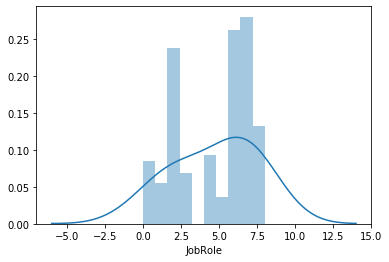

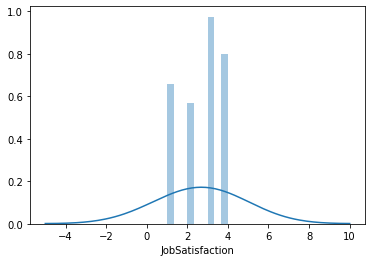

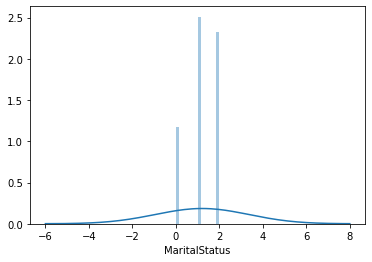

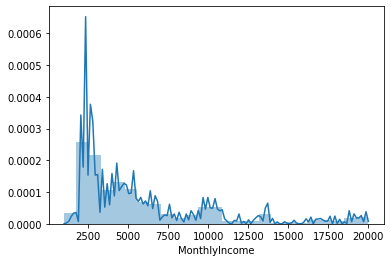

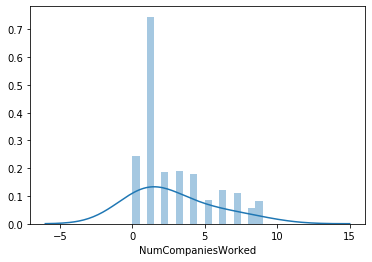

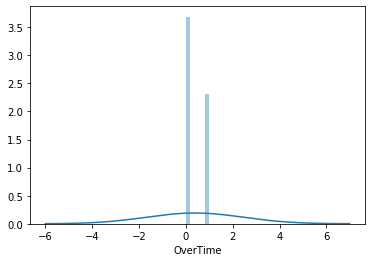

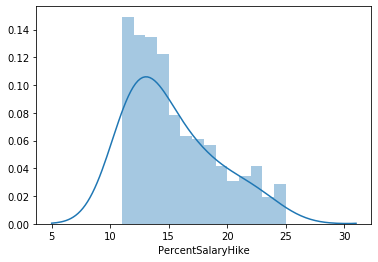

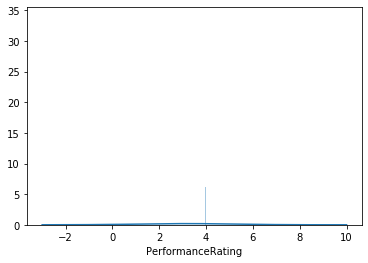

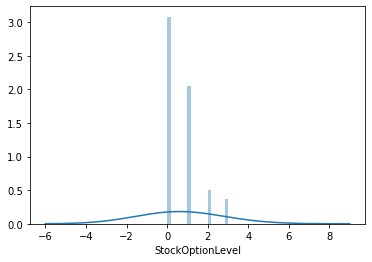

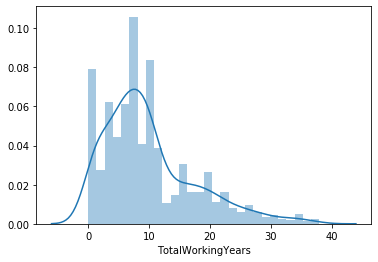

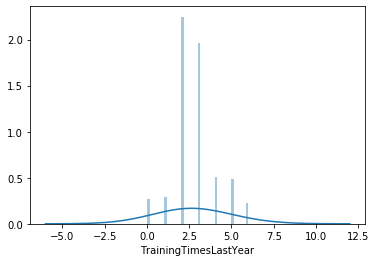

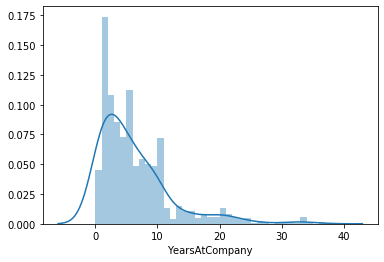

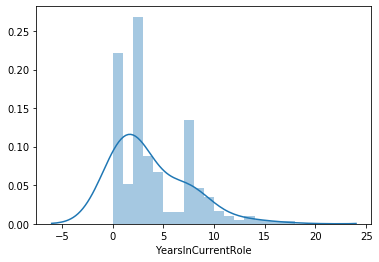

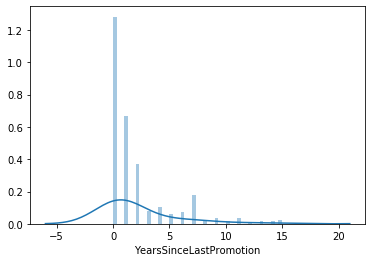

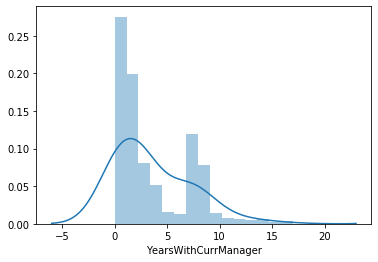

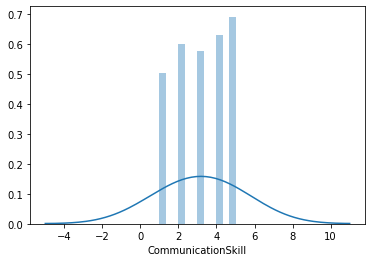

In [46]:
for i in train.columns:
        plt.figure()
        sns.distplot(train[i], kde_kws={'bw':2})
